In [9]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

from basic_classification_processing import basic_stats_processing

In [10]:
filename = 'calibrating-strong-lenses-classifications.csv'
#data = pd.read_csv('data/'+filename)
outfile = 'data/' + 'output_cleaned.csv'

# since we've already printed the stats to the screen above, don't re-print them
basic_stats_processing('data/'+filename, workflow_id=26723, workflow_ver_min=9.31,
                       remove_duplicates=True, outfile_csv=outfile, keep_nonlive=False,
                       keep_allcols=True, verbose=False)

data = pd.read_csv(outfile)

Reading classifications from data/calibrating-strong-lenses-classifications.csv
File with used subset of classification info written to data/output_cleaned.csv .


In [11]:
for i in range(len(data)):
    print(data.iloc[i])
    print(data['annotations'].iloc[i])
    print(data['subject_data'].iloc[i])
    print(data['subject_ids'].iloc[i])

Unnamed: 0                                                          79
classification_id                                            566639756
user_name                                                     Krojas26
user_id                                                      2401438.0
user_ip                                           2ba3e11a872f080bc1cb
workflow_id                                                      26723
workflow_name                                            Basic scoring
workflow_version                                                  9.31
created_at                                     2024-06-10 08:13:47 UTC
gold_standard                                                      NaN
expert                                                             NaN
metadata             {"source":"api","session":"b260497f56bca2763d8...
annotations          [{"task":"T0","task_label":"Please select the ...
subject_data         {"99855497":{"retired":null,"#CLASS":"single_c...
subjec

In [12]:
unique_user_names = data['user_name'].unique()

In [13]:
# Saving file with subject ids & my 'new id'
subject_ids_list, new_id_list = [], []
for i in range(len(data)):
    if data['subject_ids'].iloc[i] not in subject_ids_list:
        subject_ids_list.append(data['subject_ids'].iloc[i])
        line_tmp = json.loads(data['subject_data'].iloc[i])
        line_tmp = line_tmp[str(data['subject_ids'].iloc[i])]
        new_id_list.append(line_tmp['#NEW_ID'])

In [14]:
username_list = ['Krojas26', 'anasainzdm', 'sgonzalezloz', 'SkyLi', 'carlos.melo']

#Adding each person as a new column
new_data = pd.DataFrame(columns = username_list)
new_data['SUBJECT_ID'] = subject_ids_list
new_data['new_id'] = new_id_list 
score_conv = {'A': 3, 'B': 2, 'C': 1, 'Z': 0}

for i in range(len(data)):
    if(data['user_name'].iloc[i] in username_list):
        row_new_data = new_data[new_data['SUBJECT_ID'] == data['subject_ids'].iloc[i]]
        line_tmp = json.loads(data['annotations'].iloc[i])[0]['value']
        score = score_conv[line_tmp[0]]
        new_data.iloc[row_new_data.index, new_data.columns.get_loc(data['user_name'].iloc[i])] = score

In [15]:
new_data['average'] = new_data[username_list].mean(axis=1)
new_data

,Krojas26,anasainzdm,sgonzalezloz,SkyLi,carlos.melo,SUBJECT_ID,new_id,average
0,1,1,2,1,2,99855497,33,1.400000
1,1,1,1,0,2,99855491,27,1.000000
2,0,0,1,2,2,99855493,29,1.000000
3,0,0,0,0,NaN,99855481,17,0.000000
4,0,0,0,0,NaN,99855469,5,0.000000
...,...,...,...,...,...,...,...,...
95,NaN,0,0,0,0,99855500,36,0.000000
96,NaN,0,1,0,NaN,99855482,18,0.333333
97,NaN,0,0,0,0,99855524,60,0.000000
98,NaN,0,0,0,0,99855530,66,0.000000


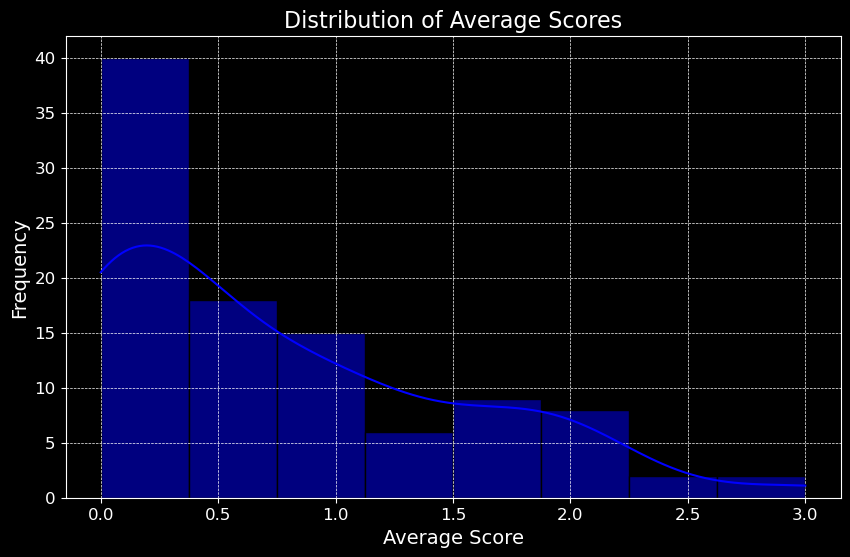

In [17]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram
sns.histplot(new_data['average'], bins='auto', kde=True, ax=ax, color='blue', edgecolor='black')

# Customize the plot
ax.set_title('Distribution of Average Scores', fontsize=16)
ax.set_xlabel('Average Score', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Add a grid for better readability
ax.grid(True, linestyle='--', linewidth=0.5)

# Save the plot
#plt.savefig('average_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
#Plotting the ones with very low scores or very high scores:

In [35]:
#For 3D plot:

path = '/Users/jimenagonzalez/research/DSPL/Citizen_science_project/Intersection/data/For_zooniverse/'
complete_manifest = pd.read_csv(path + 'complete_manifest_beta.csv')

new_data = new_data.rename(columns={'new_id': '#NEW_ID'})
new_data['#NEW_ID'] = new_data['#NEW_ID'].astype(complete_manifest['#NEW_ID'].dtype)

complete_manifest = complete_manifest.merge(new_data, on='#NEW_ID', how='left')
print(complete_manifest.columns)
complete_manifest

Index(['COADD_OBJECT_ID', 'K_RA', 'K_DEC', 'K_SCORE', 'Y3_COADD_OBJECT_ID',
       'J_RA', 'J_DEC', 'score_sims', 'score_real', 'score_both', 'G_RA',
       'G_DEC', 'SINGLE', 'RING', 'SMOOTH', 'COMPANIONS', 'SDSS_SPIRALS',
       'DES_SPIRALS', 'CROWDED', 'ARTIFACTS', 'MOST_NEGATIVES', 'index', 'ra',
       'dec', 'name', 'score', 'image_sep', 'info', 'n_img', 'flag',
       'image_conf', 'lens_type', 'source_type', 'contaminant_type', 'papers',
       '#subject_id', '#NEW_ID', '#image_name_1', '#image_name_2',
       '#image_name_3', '#image_name_4', '!Subject Type', 'Colours',
       'Size-in-arcsec', '#CLASS', 'Krojas26', 'anasainzdm', 'sgonzalezloz',
       'SkyLi', 'carlos.melo', 'SUBJECT_ID', 'average'],
      dtype='object')


,COADD_OBJECT_ID,K_RA,K_DEC,K_SCORE,Y3_COADD_OBJECT_ID,J_RA,J_DEC,score_sims,score_real,score_both,...,Colours,Size-in-arcsec,#CLASS,Krojas26,anasainzdm,sgonzalezloz,SkyLi,carlos.melo,SUBJECT_ID,average
0,1538255919,78.309585,-52.505695,0.944468,413391817.0,78.309585,-52.505695,0.0000,0.0,0.0,...,gri,20,single_cand,NaN,3,3,3,NaN,99855465,3.000000
1,1537731200,77.456831,-52.455477,0.411994,413390304.0,77.456831,-52.455477,0.0000,0.0,0.0,...,gri,20,single_cand,2,0,2,2,NaN,99855464,1.500000
2,1510424134,72.587800,-50.743626,0.000009,483404421.0,72.587800,-50.743626,0.0000,0.0,0.0,...,gri,20,single_cand,NaN,1,1,0,NaN,99855466,0.666667
3,1044445712,2.526065,3.911200,0.000008,178846367.0,2.526065,3.911200,0.1880,0.0,0.0,...,gri,20,single_cand,NaN,0,0,0,1,99855467,0.250000
4,1478069288,66.905377,-22.080270,0.996424,498287987.0,66.905377,-22.080270,0.9188,0.0,0.0,...,gri,20,single_cand,1,1,1,0,2,99855468,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1448527037,50.154139,-16.406181,0.973399,352008867.0,50.154139,-16.406181,0.0000,0.0,0.0,...,gri,20,single_cand,2,3,1,2,NaN,99855559,2.000000
96,1147113862,18.252334,2.846221,0.000006,296337589.0,18.252334,2.846221,0.0000,0.0,0.0,...,gri,20,single_cand,0,0,0,0,0,99855560,0.000000
97,1523642997,75.160982,-20.709252,0.995945,400885398.0,75.160982,-20.709252,0.0022,0.0,0.0,...,gri,20,single_cand,1,0,2,0,NaN,99855561,0.750000
98,1175522374,22.456177,-31.347123,0.910066,225309673.0,22.456177,-31.347123,0.0000,0.0,0.0,...,gri,20,single_cand,2,0,0,0,NaN,99855562,0.500000


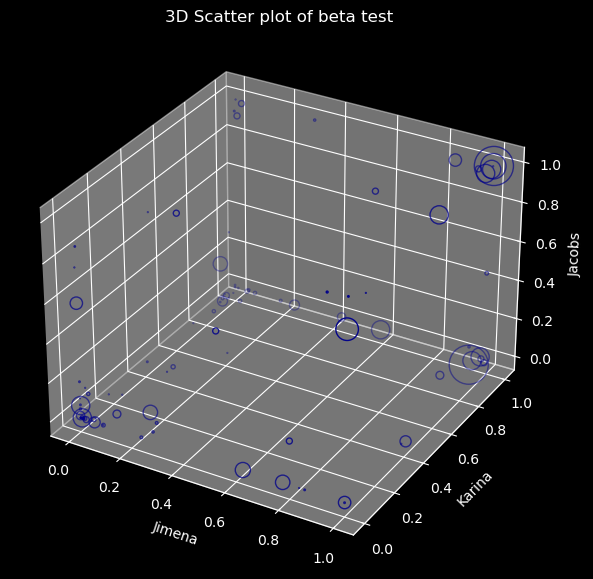

In [42]:
cand_sled = complete_manifest

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib widget

# Calculate the size for the points
size = (cand_sled['average'] + [0.8]*len(cand_sled))**5

# Create a figure
fig = plt.figure(figsize=(10, 7))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(cand_sled['SINGLE'], cand_sled['K_SCORE'], cand_sled['score_sims'], 
                s=size.values, edgecolors='#00008B', facecolors='none', linewidth=1.)

# Set labels
ax.set_xlabel('Jimena')
ax.set_ylabel('Karina')
ax.set_zlabel('Jacobs')
ax.set_title('3D Scatter plot of beta test')

# Show plot
plt.show()